In [23]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [4]:
# definition

ket0 = qt.basis(3, 0)
bra0 = qt.basis(3, 0).dag()

ket1 = qt.basis(3, 1)
bra1 = qt.basis(3, 1).dag()

ket2 = qt.basis(3, 2)
bra2 = qt.basis(3, 2).dag()

In [94]:
Delta_2 = -1.9295662078348508 # this is rad/s
Omega_0_01 = 0.097
Omega_0_12 = 5.136203/20

Omega_0_01, Omega_0_12

(0.097, 0.25681015)

In [95]:
def delta_func(subspace):
    if subspace == '01':
        return 0
    if subspace == '12':
        return -Delta_2
    
def lambda_0_func(on):
    if on == True:
        return 0.54
    else:
        return 0

def lambda_1_func(on):
    if on == True:
        return 0.61
    else:
        return 0.0

# Limiting cases

We trynna see Rabi oscillations on 01. We don't have coupling between b and c.

In [96]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(False)

delta, lambda_0, lambda_1

(0, 0.54, 0.0)

In [100]:
Omega_0 = Omega_0_01

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.        ]
 [ 0.          0.         -1.92956621]]

In [101]:
psi = ket1

times = np.linspace(0, 100, 80)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2])

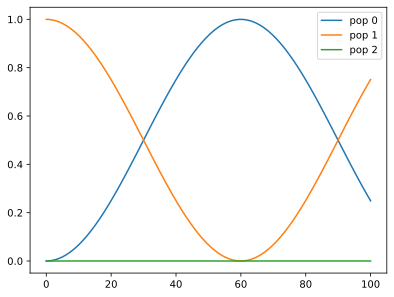

In [102]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

It's a perfect Rabi ocillation. If we turn on the coupling, the population of the $|2\rangle$ state will start to wiggle.

In [106]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

Omega_0 = Omega_0_01
H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

psi = ket1

times = np.linspace(0, 100, 80)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2])

H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.029585  ]
 [ 0.          0.029585   -1.92956621]]

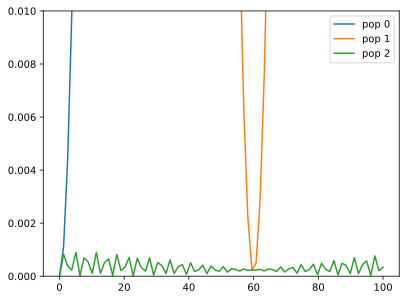

In [108]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.ylim([0, 0.01])
plt.legend()

Similarly, we can see the Rabi oscillations on the $12$ subspace as well. This is obtained by driving on resonant with the $12$ subspace, that is $\delta=-\Delta_2$.

In [109]:
delta = delta_func('12')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

Omega_0 = Omega_0_12

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

psi = ket1

times = np.linspace(0, 100, 80)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2])

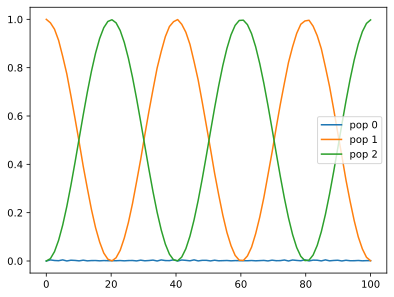

In [110]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

# Tracking the amplitudes

At any given time $t$, the qutrit's wavefunction reads

\begin{align}
|\psi(t)\rangle = a(t)|0\rangle + b(t)|1\rangle + c(t)|2\rangle
\end{align}

Let us focus on the only case where we have pretty much a good idea how the amplitude (or the phase) evolves. That is when we have $\lambda_1 = 0$, that is we have completely decoupled the two subspaces. 

In [111]:
lambda_1 = lambda_1_func(False)

lambda_1

0.0

Then, suppose we are on resonant with the first subspace, that means $\delta=0$,

In [112]:
delta = delta_func('01')

delta

0

We will try to store the state, $|\psi(t)\rangle$

In [113]:
options = {'store_states': True}

Finally, to have an oscillation of $c(t)$, we need some population. Let's say we create an equal superposition of $|1\rangle$ and $|2\rangle$

In [114]:
psi = (ket1+ket2)/np.sqrt(2)

We have all the ingredients. Let's run the program.

In [122]:
Omega_0 = Omega_0_01

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

times = np.linspace(0, 120, 200)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2], options=options)

What are we expecting? We expect perfect Rabi oscillations on the $01$ subspace. Let's plot the populations.

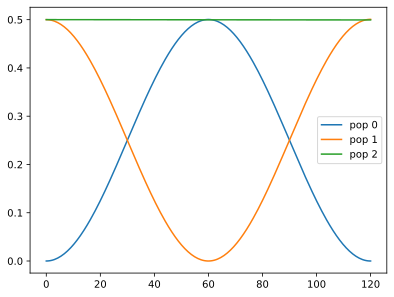

In [123]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

Yes. The plot clearly indicates oscillations between the two eigenstates $|0\rangle$ and $|1\rangle$. The population of $|2\rangle$ stays the same, at 0.5 as it was initially. But that is $|c(t)|^2=c(0)$. How about $c(t)$? We find $c(t)$ by noting that 

\begin{align}
c(t) = \langle 2|\psi(t)\rangle
\end{align}

In [124]:
amplitude_c = []

for idx in range(len(times)):
    amplitude_c.append(bra2*result.states[idx])

amplitude_c = np.array(amplitude_c)

amplitude_c

array([ 0.70710678+0.00000000e+00j,  0.2800673 +6.49278525e-01j,
       -0.48525245+5.14325082e-01j, -0.66445853-2.41857357e-01j,
       -0.04109656-7.05911524e-01j,  0.63190358-3.17328892e-01j,
        0.54165619+4.54538611e-01j, -0.20282945+6.77387464e-01j,
       -0.702323  +8.20532783e-02j, -0.35351336-6.12385010e-01j,
        0.42228469-5.67150330e-01j,  0.68802167+1.63115873e-01j,
        0.12273081+6.96358024e-01j, -0.59079663+3.88501542e-01j,
       -0.59072648-3.88604052e-01j,  0.12285191-6.96329739e-01j,
        0.68803922-1.62992447e-01j,  0.42217559+5.67211655e-01j,
       -0.35361059+6.12305172e-01j, -0.70228365-8.21736385e-02j,
       -0.20270203-6.77394625e-01j,  0.54170974-4.54421496e-01j,
        0.63181324+3.17422618e-01j, -0.04121868+7.05863204e-01j,
       -0.66446031+2.41725284e-01j, -0.48513037-5.14377231e-01j,
        0.28016253-6.49185012e-01j,  0.70705658+1.25382602e-04j,
        0.27993047+6.49280164e-01j, -0.48530655+5.14198526e-01j,
       -0.66436171-2.4195

In [125]:
def amplitude_c_th(t):
    return (1/np.sqrt(2))*np.exp(-1j*Delta_2*t)

amplitude_c_th_list = np.array([amplitude_c_th(t) for t in times])

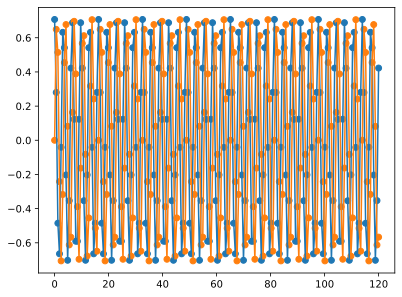

In [126]:
plt.plot(times, np.real(amplitude_c))
plt.plot(times, np.imag(amplitude_c))
plt.scatter(times, np.real(amplitude_c_th_list))
plt.scatter(times, np.imag(amplitude_c_th_list))

The other limiting case predicts that the phase of the amplitude $a(t)$ does not oscillate. Let's see for ourselves.

In [127]:
lambda_0 = lambda_0_func(False)
lambda_1 = lambda_1_func(True)
delta = delta_func('12')

lambda_0, lambda_1, delta

(0, 0.61, 1.9295662078348508)

Let us again prepare an equal superposition for this case as well. 

In [128]:
psi = (ket0+ket1)/np.sqrt(2)

In [129]:
Omega_0 = Omega_0_12

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

times = np.linspace(0, 40, 200)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2], options=options)

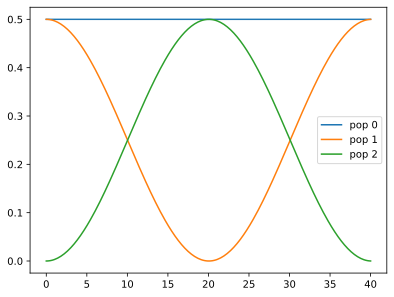

In [130]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

Yes. The plot clearly indicates oscillations between the two eigenstates $|1\rangle$ and $|2\rangle$. The population of $|0\rangle$ stays the same, at 0.5 as it was initially. But that is $|a(t)|^2=a(0)$. How about $a(t)$? We find $a(t)$ by noting that 

\begin{align}
a(t) = \langle 0|\psi(t)\rangle
\end{align}

In [131]:
amplitude_a = []

for idx in range(len(times)):
    amplitude_a.append(bra0*result.states[idx])

amplitude_a = np.array(amplitude_a)

amplitude_a

array([0.70710678+0.j, 0.70710676+0.j, 0.70710679+0.j, 0.70710682+0.j,
       0.70710684+0.j, 0.70710686+0.j, 0.70710688+0.j, 0.70710689+0.j,
       0.70710692+0.j, 0.70710694+0.j, 0.70710695+0.j, 0.70710697+0.j,
       0.70710699+0.j, 0.707107  +0.j, 0.70710703+0.j, 0.70710705+0.j,
       0.70710706+0.j, 0.70710708+0.j, 0.70710711+0.j, 0.70710711+0.j,
       0.70710714+0.j, 0.70710716+0.j, 0.70710717+0.j, 0.70710719+0.j,
       0.70710722+0.j, 0.70710722+0.j, 0.70710725+0.j, 0.70710727+0.j,
       0.70710728+0.j, 0.70710729+0.j, 0.70710733+0.j, 0.70710734+0.j,
       0.70710735+0.j, 0.70710738+0.j, 0.70710739+0.j, 0.7071074 +0.j,
       0.70710745+0.j, 0.70710745+0.j, 0.70710745+0.j, 0.70710749+0.j,
       0.70710751+0.j, 0.7071075 +0.j, 0.70710756+0.j, 0.70710757+0.j,
       0.70710755+0.j, 0.7071076 +0.j, 0.70710763+0.j, 0.70710762+0.j,
       0.70710767+0.j, 0.70710769+0.j, 0.70710768+0.j, 0.70710772+0.j,
       0.70710775+0.j, 0.70710774+0.j, 0.70710778+0.j, 0.70710781+0.j,
      

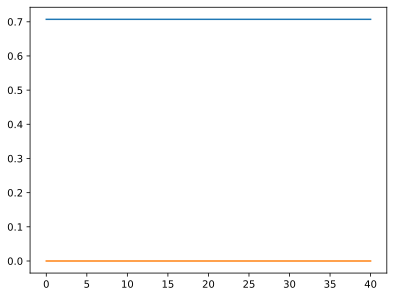

In [132]:
plt.plot(times, np.real(amplitude_a))
plt.plot(times, np.imag(amplitude_a))

In [137]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

Omega_0 = Omega_0_01

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

psi = (1/np.sqrt(2))*(ket1+ket2)

times = np.linspace(0, 150, 1000)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2], options=options)

H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.029585  ]
 [ 0.          0.029585   -1.92956621]]

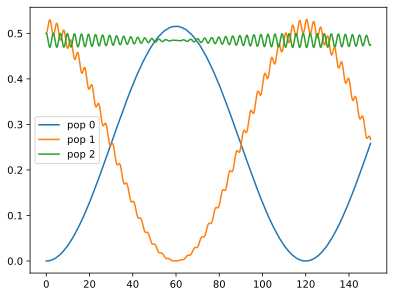

In [138]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

# The eigenvalue problem

In [139]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

In [146]:
def cubic_eqn(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

a = 1
b = -Delta_2
c = -(Omega_0**2/4)*(lambda_0**2+lambda_1**2)
d = lambda_0**2*Omega_0**2*(2*delta+Delta_2)/4

x_range = np.linspace(-5, 5, 10000)
y_range = [cubic_eqn(x, a, b, c, d) for x in x_range]

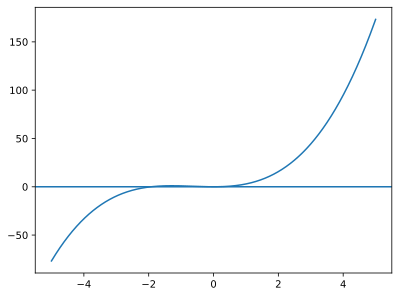

In [148]:
plt.plot(x_range, y_range)
plt.axhline(0)

In [153]:
a, b, c, d

(1, 1.9295662078348508, -0.001561188325, -0.0013235205279698704)

#### Finding the roots

In [154]:
Delta_0 = b**2 - 3*a*c 
Delta_1 = 2*b**3 - 9*a*b*c + 27*a**2*d 

Delta_0, Delta_1

(3.7279093153931666, 14.359797876163588)

In [155]:
cuberoots_of_1 = 1, complex(-.5, .75**.5), complex(-.5, -.75**.5)

def cuberoot(z):
    cuberoot = complex(z)**(1/3)
    return [cuberoot * cr1 for cr1 in cuberoots_of_1]

In [156]:
import cmath

In [157]:
C = cuberoot((Delta_1 + cmath.sqrt(Delta_1**2-4*Delta_0**3))/2)

C

[(1.9302465895301921+0.04535878085032812j),
 (-1.0044051512661714+1.6489631916762562j),
 (-0.9258414382640208-1.6943219725265841j)]

In [158]:
x0 = (-1/(3*a))*(b+C[0]+Delta_0/C[0])
x1 = (-1/(3*a))*(b+C[1]+Delta_0/C[1])
x2 = (-1/(3*a))*(b+C[2]+Delta_0/C[2])

x0, x1, x2

((-1.930019795631745+2.3129646346357427e-18j),
 (0.026414698232497386+7.401486830834377e-17j),
 (-0.025961110435603008-2.220446049250313e-16j))

(-0.05, 0.05)

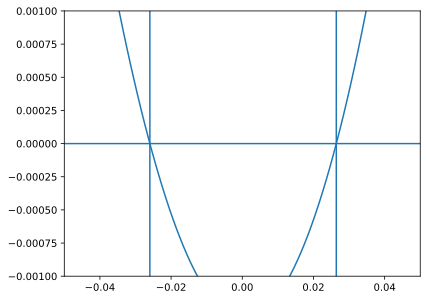

In [159]:
plt.plot(x_range, y_range)
plt.axhline(0)
plt.axvline(np.real(x0))
plt.axvline(np.real(x1))
plt.axvline(np.real(x2))
plt.ylim([-0.001, 0.001])
plt.xlim([-0.05, 0.05])

Another way to see this is to diagonalize the Hamiltonian using QuTiP

In [160]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.029585  ]
 [ 0.          0.029585   -1.92956621]]

In [161]:
eig_val, eig_vec = H_eff.eigenstates()

eig_val

array([-1.9300198 , -0.02596111,  0.0264147 ])

In [162]:
x0, x1, x2

((-1.930019795631745+2.3129646346357427e-18j),
 (0.026414698232497386+7.401486830834377e-17j),
 (-0.025961110435603008-2.220446049250313e-16j))

### Full scale 

Ok now we turn on all the interactions AND track the phase.

In [177]:
delta = delta_func('01')
lambda_0 = lambda_0_func(True)
lambda_1 = lambda_1_func(True)

H_eff = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2 + (Omega_0/2)*(lambda_0*ket0*bra1+lambda_0*ket1*bra0+lambda_1*(ket1*bra2+ket2*bra1))

psi = (1/np.sqrt(2))*(ket1+ket2)

times = np.linspace(0, 60, 60)
times_finer = np.linspace(0, 60, 1000)
result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2], options=options)

H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.029585  ]
 [ 0.          0.029585   -1.92956621]]

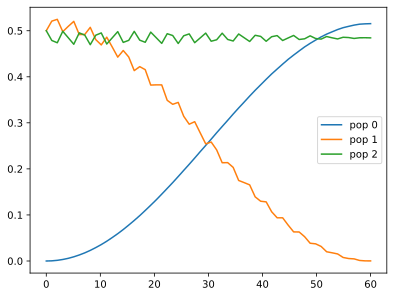

In [178]:
plt.plot(times, result.expect[0], label='pop 0')
plt.plot(times, result.expect[1], label='pop 1')
plt.plot(times, result.expect[2], label='pop 2')
plt.legend()

In [179]:
H_eff

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.02619     0.        ]
 [ 0.02619     0.          0.029585  ]
 [ 0.          0.029585   -1.92956621]]

In [180]:
A = (lambda_0*Omega_0)/2
B = (lambda_1*Omega_0)/2

In [181]:
xi_0 = Delta_2**2 + 3*(A**2+B**2)
xi_1 = -2*Delta_2**3 - 9*Delta_2*(A**2+B**2) + 27*Delta_2*A**2

xi_0, xi_1

(3.7279093153931666, 14.359797876163588)

In [182]:
my_C = cuberoot((xi_1 + cmath.sqrt(xi_1**2-4*xi_0**3))/2)

my_C

[(1.9302465895301921+0.04535878085032812j),
 (-1.0044051512661714+1.6489631916762562j),
 (-0.9258414382640208-1.6943219725265841j)]

In [183]:
eigen_vals = [np.real((-1/3)*(-Delta_2+C[k]+xi_0/C[k])) for k in range(3)]

eigen_vals.sort()

In [184]:
eigen_vals

[-1.930019795631745, -0.025961110435603008, 0.026414698232497386]

In [185]:
def N_k(k):
    return np.sqrt(1+np.abs(A/eigen_vals[k])**2+np.abs(np.abs(B/(Delta_2-eigen_vals[k])))**2)

N_k(0), N_k(1), N_k(2)

(65.2320846599019, 1.4205465630443694, 1.4082925896643248)

In [186]:
def phi_k(k):
    return (1/N_k(k))*((A/eigen_vals[k])*ket0+ket1+(-B/(Delta_2-eigen_vals[k]))*ket2)

In [187]:
phi_k(0), phi_k(1), phi_k(2)

(Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[-2.08023537e-04]
  [ 1.53298795e-02]
  [-9.99882469e-01]],
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.7101609 ]
  [ 0.7039544 ]
  [ 0.01094055]],
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.70403938]
  [0.71007971]
  [0.01074024]])

We find the time-dependent evolution of the probablity amplitudes

In [188]:
psi0 = (1/np.sqrt(2))*(ket1+ket2)

c_k = [phi_k(k).dag()*psi0 for k in range(3)]

c_k

[(-0.6961838123377433+0j), (0.5055070667830555+0j), (0.5096966792821663+0j)]

In [189]:
def a_k(t, k):
    if k == 0:
        brak = bra0
    elif k == 1:
        brak = bra1 
    elif k == 2:
        brak = bra2 
 
    return c_k[0]*np.exp(-1j*eigen_vals[0]*t)*brak*phi_k(0) + c_k[1]*np.exp(-1j*eigen_vals[1]*t)*brak*phi_k(1) + c_k[2]*np.exp(-1j*eigen_vals[2]*t)*brak*phi_k(2)

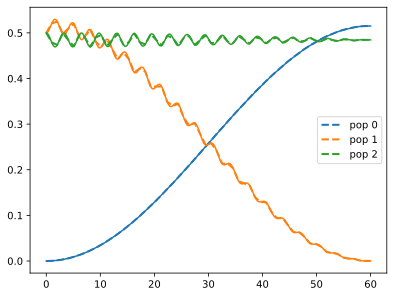

In [190]:
plt.plot(times, result.expect[0], label='pop 0', linestyle='dashed', linewidth=2)
plt.plot(times_finer, [np.abs(a_k(t, 0))**2 for t in times_finer], color='tab:blue')
plt.plot(times, result.expect[1], label='pop 1', linestyle='dashed', linewidth=2)
plt.plot(times_finer, [np.abs(a_k(t, 1))**2 for t in times_finer], color='tab:orange')
plt.plot(times, result.expect[2], label='pop 2', linestyle='dashed', linewidth=2)
plt.plot(times_finer, [np.abs(a_k(t, 2))**2 for t in times_finer], color='tab:green')
plt.legend()

This short of undermines our paper: You see, the population of $|2\rangle$ does not simply acquire a phase--It changes during gate operation. Is this the ultimate description of reality? No. At least approximately. You see, we've made the assumption that the excitation is harmonic without any modulating envelope. What about having an evelope? Let's make $\Omega_0$ time-dependent again. 

In [193]:
def add_pulse(pulse_train, pulse_name, start, tg, sigma, A):
    """
    Add a pulse to the pulse train.
    """
    pulse_train[pulse_name] = {'start': start, 'tg': tg, 'sigma': sigma, 'A': A}
    pulse_train['clock'] = pulse_train['clock']+tg

def Omega(t, args):
    for item, pulse_specs in args.items():
        if item == 'clock':
            continue
        if t <= pulse_specs['start'] or t >= (pulse_specs['start'] + pulse_specs['tg']):
            continue
        else:
            t_local = t
            t_local += -pulse_specs['start'] # convert to local time of a pulse
            return pulse_specs['A'] * (np.exp(-(t_local-pulse_specs['tg']/2)**2/(2*pulse_specs['sigma']**2)) - np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2))) \
                / (1-np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2)))
    return 0

In [194]:
pulse_train = {'clock': 0}
add_pulse(pulse_train, pulse_name='pulse_1', start=pulse_train['clock'], tg=60, sigma=60/4, A=0.18151219398122395)

pulse_train

{'clock': 60,
 'pulse_1': {'start': 0, 'tg': 60, 'sigma': 15.0, 'A': 0.18151219398122395}}

In [197]:
args = pulse_train

psi = (1/np.sqrt(2))*(ket1+ket2)

times = np.linspace(0, 60, 60)
times_finer = np.linspace(0, 60, 1000)

H0 = delta*ket1*bra1 + (2*delta+Delta_2)*ket2*bra2

Hd = qt.Qobj([
    [0           , lambda_0 / 2   , 0           ],
    [lambda_0 / 2, 0              , lambda_1 / 2],
    [0           , lambda_1 / 2   , 0]
])

H_eff = [H0, [Hd, lambda t, args: Omega(t, args)]]

result = qt.sesolve(H_eff, psi, times, [ket0*bra0, ket1*bra1, ket2*bra2], args=args, options=options)

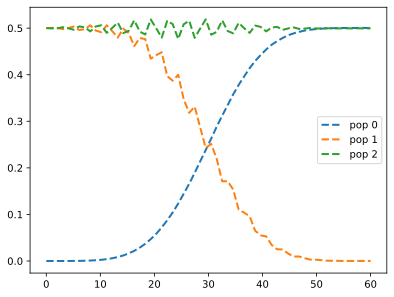

In [199]:
plt.plot(times, result.expect[0], label='pop 0', linestyle='dashed', linewidth=2)
# plt.plot(times_finer, [np.abs(a_k(t, 0))**2 for t in times_finer], color='tab:blue')
plt.plot(times, result.expect[1], label='pop 1', linestyle='dashed', linewidth=2)
# plt.plot(times_finer, [np.abs(a_k(t, 1))**2 for t in times_finer], color='tab:orange')
plt.plot(times, result.expect[2], label='pop 2', linestyle='dashed', linewidth=2)
# plt.plot(times_finer, [np.abs(a_k(t, 2))**2 for t in times_finer], color='tab:green')
plt.legend()

In [200]:
amplitude_c = []

for idx in range(len(times)):
    amplitude_c.append(bra2*result.states[idx])

amplitude_c = np.array(amplitude_c)

amplitude_c

array([ 0.70710678+0.j        , -0.26956513+0.65329648j,
       -0.50013295-0.49920605j,  0.65386481-0.27307588j,
        0.00529722+0.70678952j, -0.65210434-0.26717362j,
        0.49991871-0.50380529j,  0.28000738+0.65066219j,
       -0.70212086+0.00611961j,  0.26955029-0.65642445j,
        0.51221545+0.49377701j, -0.64232231+0.27820565j,
       -0.00109371-0.70741694j,  0.6662712 +0.2607082j ,
       -0.48207056+0.50693743j, -0.2697741 -0.64922969j,
        0.71882509-0.01218221j, -0.24644544+0.6571858j ,
       -0.4949605 -0.49137975j,  0.66239666-0.28263137j,
        0.02788234+0.70633623j, -0.64241897-0.25871288j,
        0.50628215-0.50924645j,  0.29864364+0.64758641j,
       -0.6903538 +0.01280429j,  0.27475441-0.65788628j,
        0.5246621 +0.49056213j, -0.63227432+0.28184392j,
        0.00309016-0.70656686j,  0.67201978+0.25941703j,
       -0.47741489+0.50791653j, -0.26773615-0.6483135j ,
        0.71880278-0.01096328j, -0.2490672 +0.65710343j,
       -0.49690838-0.49189251j,

In [203]:
def amplitude_c_th(t):
    return (1/np.sqrt(2))*np.exp(-1j*Delta_2*t)

amplitude_c_th_list = np.array([amplitude_c_th(t) for t in times_finer])

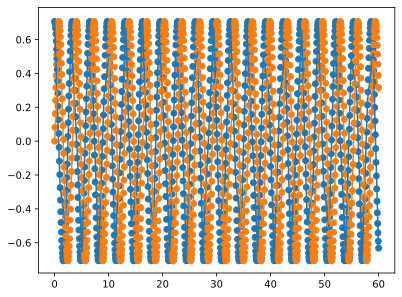

In [206]:
plt.plot(times, np.real(amplitude_c))
plt.plot(times, np.imag(amplitude_c))
plt.scatter(times_finer, np.real(amplitude_c_th_list))
plt.scatter(times_finer, np.imag(amplitude_c_th_list))